<a href="https://colab.research.google.com/github/jh-4166640/Machine-Learning-Lecture/blob/main/CatDogClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install os
!pip install cv2



ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [30]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2


In [60]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahdinavaei/cat-and-dog-classifier")

print("Path to dataset files:", path)



Using Colab cache for faster access to the 'cat-and-dog-classifier' dataset.
Path to dataset files: /kaggle/input/cat-and-dog-classifier


In [92]:
dir ="/kaggle/input/cat-and-dog-classifier/data"
class_names = sorted(os.listdir(dir))  # 폴더명을 알파벳 순서로 정렬
print(class_names)
full_ds = keras.utils.image_dataset_from_directory(
    dir,
    labels="inferred",
    label_mode="binary",       # 분류 결과를 정수로
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=777,
)
dataset_size = tf.data.experimental.cardinality(full_ds).numpy()
print("전체 배치 수:", dataset_size)


train_size = int(0.8 * dataset_size)

train_ds = full_ds.take(train_size)
test_ds  = full_ds.skip(train_size)


train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds  = test_ds.map(lambda x, y: (x / 255.0, y))


print("train batch 개수:", tf.data.experimental.cardinality(train_ds).numpy())
print("test batch 개수:", tf.data.experimental.cardinality(test_ds).numpy())


['Cat', 'Dog', 'cat_test.jpg', 'dog_test2.jpg']
Found 1152 files belonging to 2 classes.
전체 배치 수: 36
train batch 개수: 28
test batch 개수: 8


In [109]:
my_lr = 0.003
my_momentum = 0.9
my_beta = 0.99


optimizer= keras.optimizers.Adam(learning_rate=my_lr,beta_1 = my_momentum,beta_2 =my_beta)
#optimizer= keras.optimizers.SGD(learning_rate=my_lr,momentum=my_momentum)
loss= keras.losses.BinaryCrossentropy()
metrics= [keras.metrics.BinaryAccuracy(threshold=0.5)]

# 2층 CNN
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3),padding="valid", strides=(7,7),activation="relu", input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3),padding="valid", strides=(7,7),activation="relu", input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation="sigmoid") # 고양이, 강아지 이진분류
])

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
epoch = 20
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_model.h5",
    save_best_only=True,        # validation_loss 기준 최적 모델만 저장
    monitor="val_loss",
    mode="min"
)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epoch,
    callbacks=[checkpoint_cb]
)

"""
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epoch
)
"""


Epoch 1/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - binary_accuracy: 0.5222 - loss: 0.7004

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 293ms/step - binary_accuracy: 0.5219 - loss: 0.7002 - val_binary_accuracy: 0.5586 - val_loss: 0.6908
Epoch 2/20
26/28 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - binary_accuracy: 0.4977 - loss: 0.6932

28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 300ms/step - binary_accuracy: 0.4985 - loss: 0.6932 - val_binary_accuracy: 0.5547 - val_loss: 0.6858
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 352ms/step - binary_accuracy: 0.5173 - loss: 0.6939 - val_binary_accuracy: 0.5977 - val_loss: 0.6876
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - binary_accuracy: 0.5199 - loss: 0.6909

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - binary_accuracy: 0.5201 - loss: 0.6909 - val_binary_accuracy: 0.5547 - val_loss: 0.6736
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - binary_accuracy: 0.5404 - loss: 0.6882 - val_binary_accuracy: 0.5820 - val_loss: 0.6819
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - binary_accuracy: 0.5510 - loss: 0.6832

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step - binary_accuracy: 0.5513 - loss: 0.6831 - val_binary_accuracy: 0.5820 - val_loss: 0.6727
Epoch 7/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - binary_accuracy: 0.5866 - loss: 0.6748

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - binary_accuracy: 0.5873 - loss: 0.6746 - val_binary_accuracy: 0.6367 - val_loss: 0.6482
Epoch 8/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - binary_accuracy: 0.6087 - loss: 0.6744

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 355ms/step - binary_accuracy: 0.6086 - loss: 0.6743 - val_binary_accuracy: 0.6445 - val_loss: 0.6459
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 511ms/step - binary_accuracy: 0.5915 - loss: 0.6649 - val_binary_accuracy: 0.6094 - val_loss: 0.6585
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - binary_accuracy: 0.5892 - loss: 0.6671 - val_binary_accuracy: 0.5898 - val_loss: 0.6655
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - binary_accuracy: 0.5811 - loss: 0.6676

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - binary_accuracy: 0.5817 - loss: 0.6675 - val_binary_accuracy: 0.6562 - val_loss: 0.6341
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - binary_accuracy: 0.6282 - loss: 0.6547

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - binary_accuracy: 0.6279 - loss: 0.6548 - val_binary_accuracy: 0.6641 - val_loss: 0.6326
Epoch 13/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - binary_accuracy: 0.6103 - loss: 0.6384 - val_binary_accuracy: 0.6367 - val_loss: 0.6434
Epoch 14/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - binary_accuracy: 0.6143 - loss: 0.6503 - val_binary_accuracy: 0.6367 - val_loss: 0.6345
Epoch 15/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 320ms/step - binary_accuracy: 0.6586 - loss: 0.6428 - val_binary_accuracy: 0.6289 - val_loss: 0.6483
Epoch 16/20
26/28 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - binary_accuracy: 0.6903 - loss: 0.6247

28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - binary_accuracy: 0.6880 - loss: 0.6250 - val_binary_accuracy: 0.6953 - val_loss: 0.6148
Epoch 17/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - binary_accuracy: 0.6866 - loss: 0.6063

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 327ms/step - binary_accuracy: 0.6860 - loss: 0.6067 - val_binary_accuracy: 0.6602 - val_loss: 0.6086
Epoch 18/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 293ms/step - binary_accuracy: 0.6888 - loss: 0.5842 - val_binary_accuracy: 0.6523 - val_loss: 0.6171
Epoch 19/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - binary_accuracy: 0.6622 - loss: 0.6145 - val_binary_accuracy: 0.6680 - val_loss: 0.6149
Epoch 20/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - binary_accuracy: 0.6919 - loss: 0.6042

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 329ms/step - binary_accuracy: 0.6911 - loss: 0.6044 - val_binary_accuracy: 0.7031 - val_loss: 0.5900


'\nhistory = model.fit(\n    train_ds,\n    validation_data=test_ds,\n    epochs=epoch\n)\n'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[  4  26  95 132 245]
[0. 1.]
틀린 이미지 개수: 5


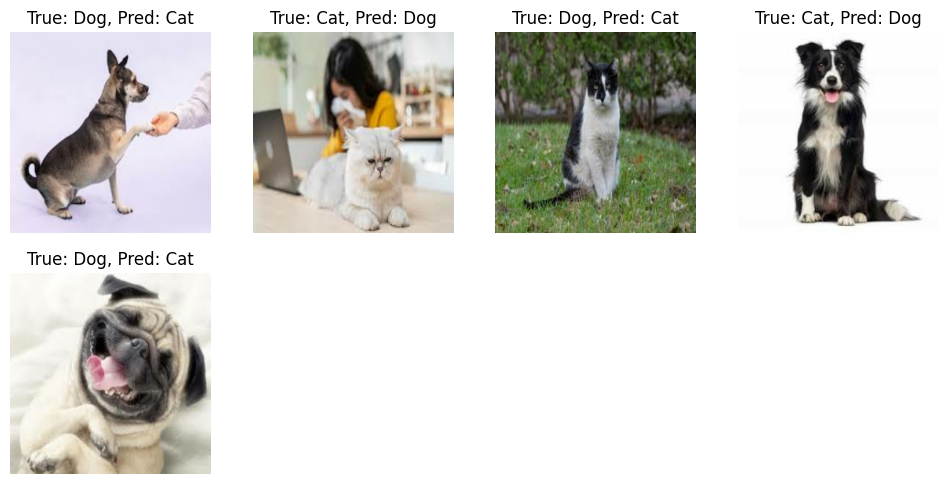

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 모델 예측
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend((preds > 0.5).astype(int).flatten())  # 0/1 변환
    y_true.extend(labels.numpy())
    #print(y_pred, y_true)

y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()

# 2. 틀린 인덱스 추출
wrong_idx = np.where(y_true != y_pred)[0]
print(np.unique(wrong_idx))
y_wrong = y_true[wrong_idx]
print(np.unique(y_wrong))

test_images_list = list(test_ds.unbatch())

num_images = len(wrong_idx)
print(f"틀린 이미지 개수: {num_images}")


plt.figure(figsize=(12,12))
for i, idx in enumerate(wrong_idx[:16]):
    img, label = test_images_list[idx]
    img = (img.numpy() * 255).astype("uint8")
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.title(f"True: {class_names[y_true[idx].astype("uint8")]}, Pred: {class_names[y_pred[idx].astype("uint8")]}")
    plt.axis("off")
plt.show()



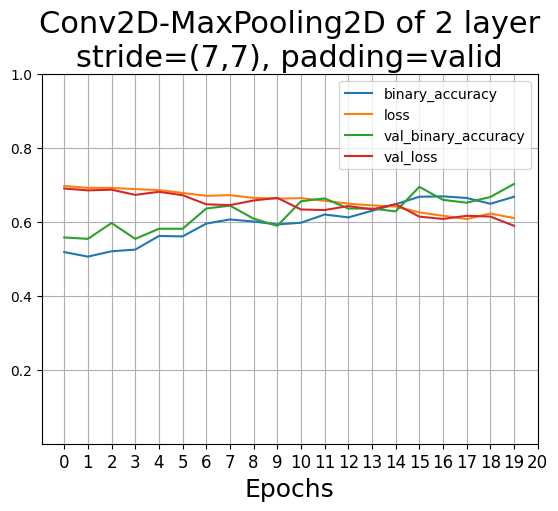

In [111]:
pd.DataFrame(history.history).plot()
plt.ylim(0,1)
plt.grid(True)
plt.gca().set_ylim(0.001)
plt.title("Conv2D-MaxPooling2D of 2 layer\nstride=(7,7), padding=valid",fontsize=22)
plt.xlabel('Epochs',fontsize=18)
xticks = np.arange(0,epoch+1,1)
plt.xticks(xticks,fontsize=12)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Filters: 4, Feature map shape: (1, 254, 254, 4)


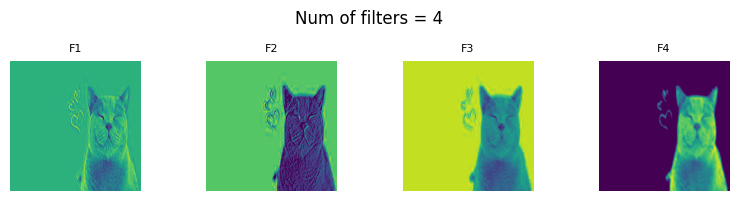

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Filters: 8, Feature map shape: (1, 254, 254, 8)


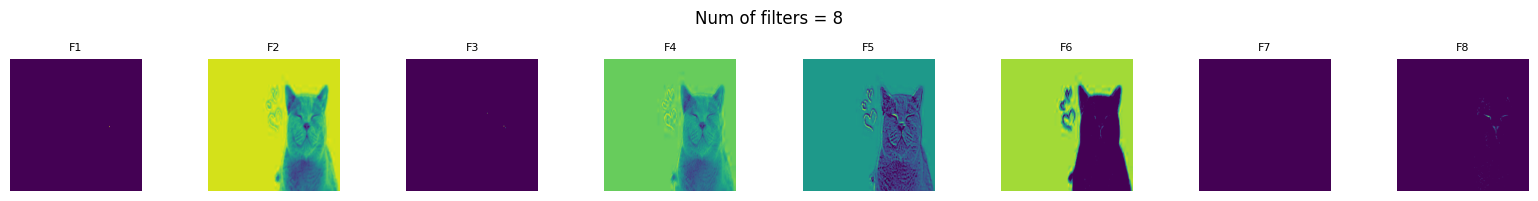

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Filters: 32, Feature map shape: (1, 254, 254, 32)


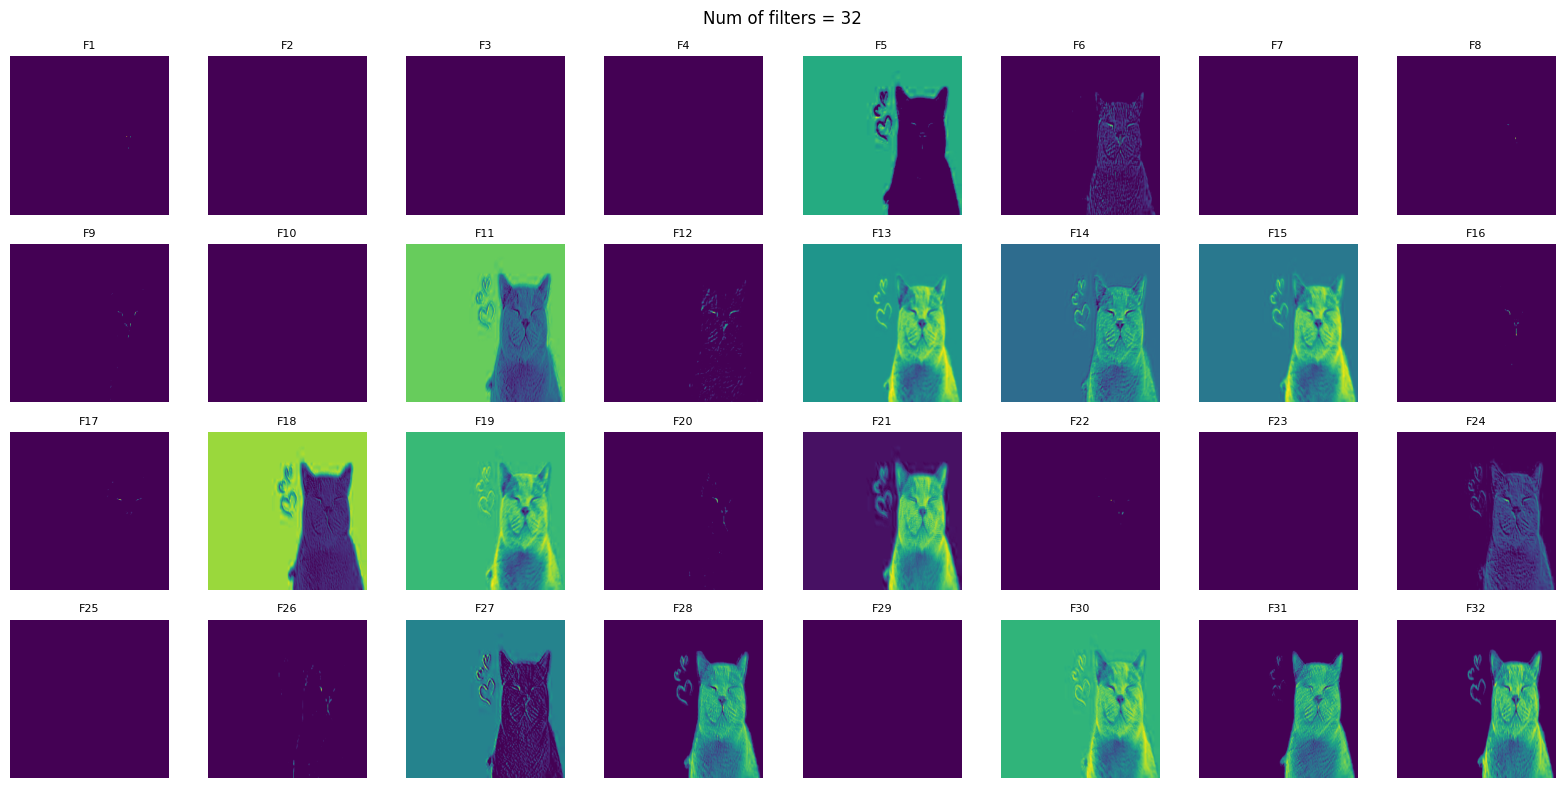

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Filters: 64, Feature map shape: (1, 254, 254, 64)


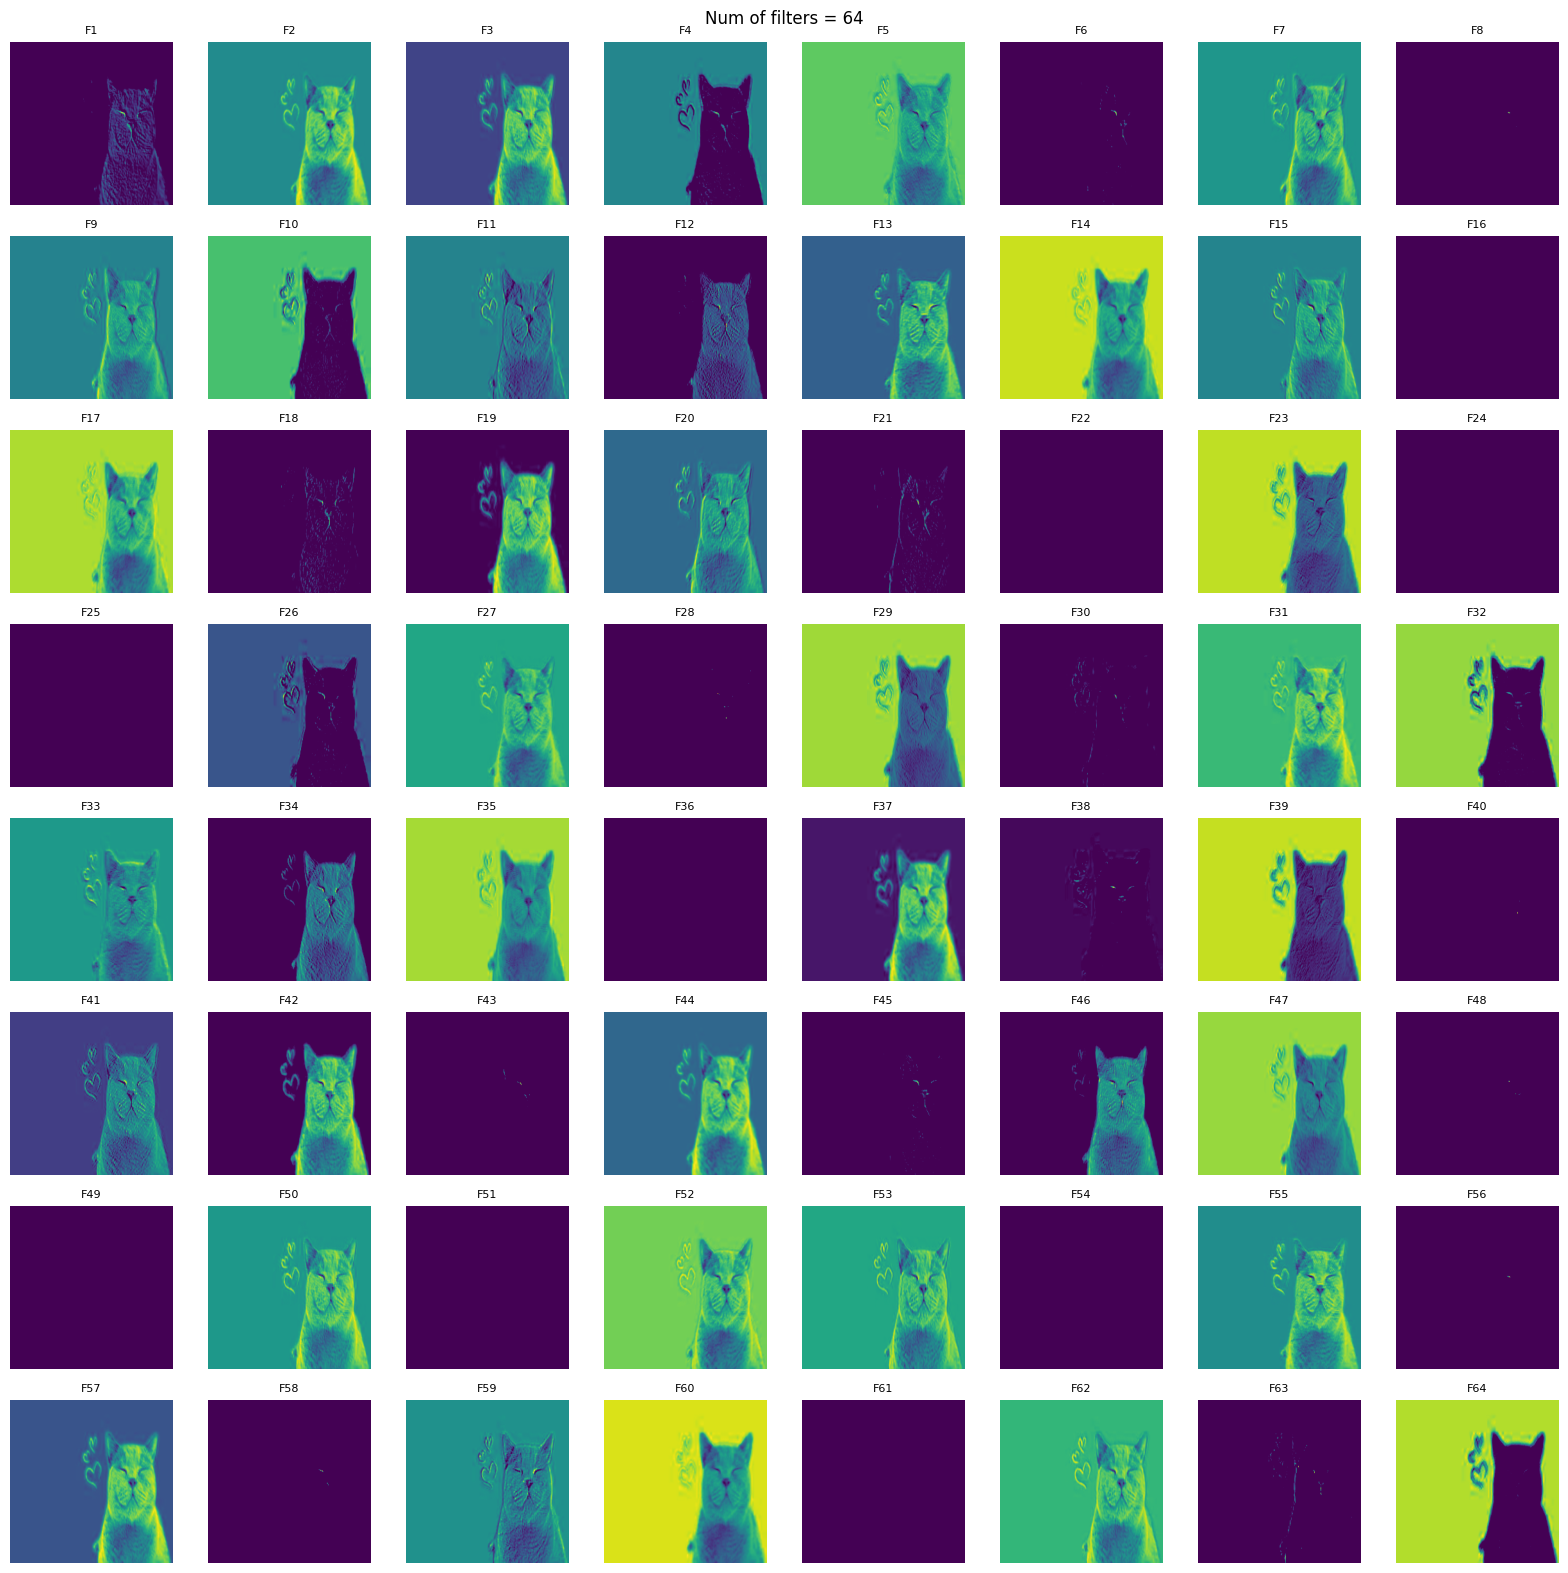

In [122]:
# GPT fiter 수에 따른 feature map 차이
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

for images, labels in train_ds.take(1):
    first_image = images[0]
input_img = tf.expand_dims(first_image, axis=0)

filters_list = [4, 8, 32, 64]
kernel_size = (3,3)

for num_filters in filters_list:
    model = keras.models.Sequential([
        keras.layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=(256,256,3))
    ])

    feature_maps = model.predict(input_img)
    print(f"Filters: {num_filters}, Feature map shape: {feature_maps.shape}")

    max_cols = 8
    n_rows = (num_filters + max_cols - 1) // max_cols
    n_cols = min(num_filters, max_cols)

    plt.figure(figsize=(n_cols*2, n_rows*2))
    for i in range(num_filters):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(feature_maps[0,:,:,i], cmap='viridis')
        plt.axis('off')
        plt.title(f'F{i+1}', fontsize=8)
    plt.suptitle(f'Num of filters = {num_filters}', fontsize=12)
    plt.tight_layout()
    plt.show()
